#**Sequence Analysis Report**
###**Novel mitochondrial genome assembly and 5mC and 6mA methylations of a new species of the genus Talaromyces**
###**Jhon Alexander Vélez Zapata y Diana Gabriela Puerres Narváez**

#**Introduction**

Within the biological methods for the recovery of soils contaminated by heavy metals, metalloids and other contaminants, the use of microorganisms to accumulate, transform or degrade contaminants represents an enormous environmental advantage (1). Thus, biorecovery mediated by mycelial fungi is presented as a viable alternative, since they are capable of developing a significantly greater mass to sequester more metals. Therefore, they could be used in remedial biotechnology to enhance cadmium detoxification from chronically polluted habitats (2). *Talaromyces* sp. is tolerant to cadmium when grown in its presence, which highlights its ability to adapt to environments with heavy metals and its potential for biorecovery (3). However, it has been observed that in vitro and cultured at different concentrations of Cd, *Talaromyces* sp. presents phenotypic variations, it is for this reason that it is intended to obtain and analyze the methylome in order to evaluate the changes in the accumulation of heavy metals. For this purpose, the data obtained from sequencing with Oxford Nanopore Technologies were processed in Guppy.

The closest species to this new species is T. pinophilus (strain 1-95), which is the only one that has reported its complete genome. Its genome has a size of 36.51 Mb, 8 chromosomes and a mitochondrial genome with a size of 31.73 kb (4), so it is possible to estimate that *Talaromyces* sp. may have similar characteristics. The phylogeny of the genus Talaromyces (5) is presented below.

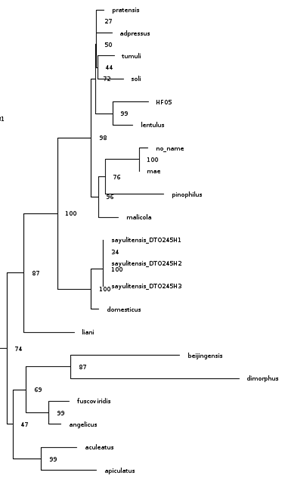

#**Methods**

In order to obtain sequencing data in the form of long reads, the following procedure was performed. Total DNA was extracted from a mycelial sample of *Talaromyces* sp. cultured in Petri dishes in the laboratory, using the CTAB method. Then, with the help of the Ligation Sequencing Kit SQK-LSK110 library preparation kit (Oxford Nanopore Technologies), the DNA fragments required for sequencing were generated. DNA in the libraries was quantified using a Qubit Fluorometer (Thermo Fisher) and loaded into a Flongle flow cell inside a MinION.
Below is a flowchart of the computational methods used in processing the data delivered by the flowcell. These methods were based on those used by Liu *et al.* (12).

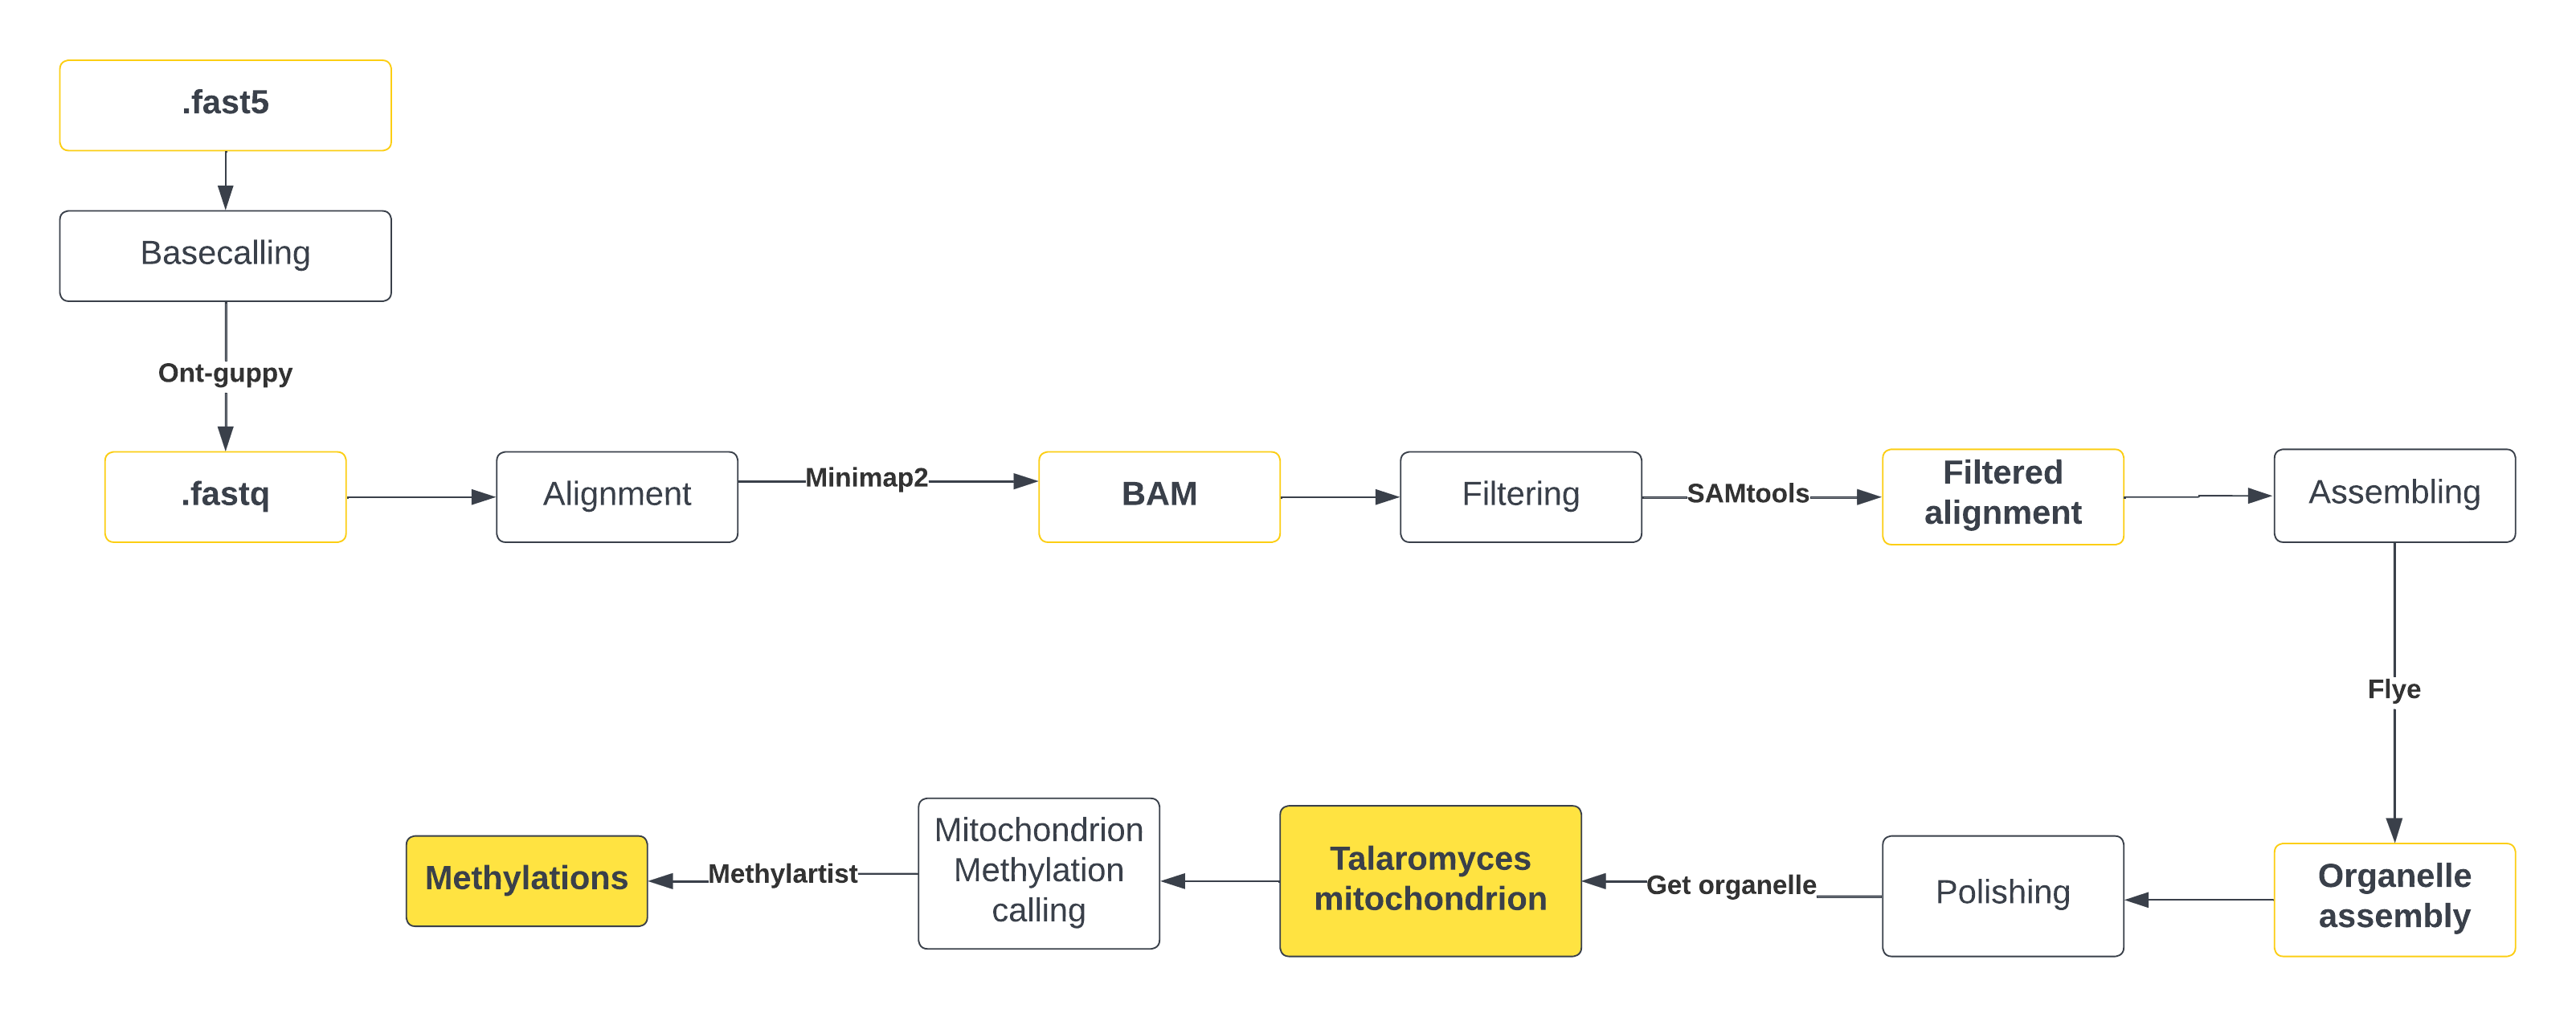

#**Results**

Taking into account that *T. pinophilus* is the phylogenetically closest species to *Talaromyces* sp. whose genome is known and which, according to Li, CX. et al. The genome of strain 1–95 consisted of eight chromosomes and that the mitochondrial genome consisted of 31.73 kb it is expected that, in the alignment, *Talaromyces* sp. have a similar size.

##Basecalling

To perform the basecalling, ont-guppy (6) was used and a line like the following was run:

In [ ]:
guppy_basecaller -i talaromyces/fast5/ -d rerio/basecall_models/ -c res_dna_r941_min_modbases-all-context_v001.cfg --fast5_out \
 -s ./guppy_out_5 --cpu_threads_per_caller 32

##Alignment

To align the reads in .fastq format to the reference mitochondria of T. pinophilus, the program minimap2 (7) was used and ordered with samtools (8) immediately on a line like the following:

In [ ]:
minimap2 -ax map-ont epigenomiks/mtDNA_T_pinufilus.fa  guppy_out_5/pass/*.fastq > alnMitTalaro.sam
samtools sort -@ 8 -O bam alnMitTalaro.sam > alnTalaro.bam

To filter the reads that did not map correctly, the following line was executed with the samtools program:

In [ ]:
samtools view -@ 32 -b -F 4 alnTalaro.bam > alnTalaro.bam

##Assembly
To assemble the Talaromyces mitochondria array, the Flye program (9) was used by running the following line:

In [ ]:
flye --nano-corr alnTalaro.bam --out-dir out_nano --threads 32

## Polishing

With GetOrganelle (10) the assembly of the mitochondrial genome of Talaromyces was defined and polished to preserve only the sequences that are specific to a mitochondria. For this, the following line was executed using the python script offered by the application:

In [ ]:
get_organelle_from_assembly.py -t 32  -g talaromyces_ensam/assembly_graph.gfa -F fungus_mt -o talaromyces_mt/

##Methylations 

To detect 5mC and 6mA methylations in the Talaromyces mitochondrial genome, methylartist (11) is used with the following parameters:

In [ ]:
methylartist db-guppy -s Talaromyces -f  guppy_out_5/workspace  -p 32 -m [C]G -n 5mC -b alnTalaro.bam -r GCA_001571465.2_ASM157146v2_genomic.fna
methylartist db-guppy -s Talaromyces -f  guppy_out_5/workspace  -p 32 -m [C]G -n 6mA -b alnTalaro.bam -r GCA_001571465.2_ASM157146v2_genomic.fna

The final file with the assembly of the mitochondria of *Talaromyces* sp. is located in this folder named *fungus_mt.complete.graph1.1.path_sequence.fasta* and its graphical version *fungus_mt.complete.graph1.selected_graph.gfa*.

#**Discussion**
###### En el presente trabajo se analizaron los resultados de la secuenciación por Oxford Nanopore de una nueva especie de Talaromyces. Teniendo en cuenta la calidad y el tamaño de los datos, estos se alinearon con el genoma mitocondrial de una especie cercana conocida, la cual se seleccionó teniendo en cuenta los resultados de Guerra-Sierra, et al. Así, se pudo confirmar la cercanía filogenética previamente descrita y ensamblar el genoma mitocondrial de la nueva especie, lo cual facilitó el proceso de análisis de las posibles metilaciones que resultan en las diferencias fenotípicas de la degradación de cadmio. 

######El ensamble de la mitocondria es útil para inferir la historia evolutiva de este hongo, la diversidad genica entre poblaciones o dentro de ellas y el estudio del mitogenoma puede revelar algunas particularidades como la presencia de genes, o mecanismos de regulación de la expresión de estos, lo cual puede explicar la capacidad bioremediativa. Desafortunadamente, no se pudo obtener el reporte de metilaciones de la mitocondria de *Talaromyces sp.* ya que el programa Methylartist no respondió adecuadamente y no generó resultados coherentes a la entrada que se le estaba entregando. De todas formas, el resultado obtenido es una motivación para reevaluar la metodología planteada y para promover la investigación sobre el genoma y mitogenoma de esta nueva especie de hongo.  

# **Bibliography**


> (1) González-Chávez, Ma. del Carmen Ángeles  (2005). Recuperación de suelos contaminados con metales pesados utilizando plantas y microorganismos rizosféricos. Terra Latinoamericana, 23(1),29-37.[fecha de Consulta 6 de Abril de 2022]. ISSN: . Disponible en:   https://www.redalyc.org/articulo.oa?id=57323104  


> (2)Massaccesi, G., Romero, M.C., Cazau, M.C. et al. Cadmium removal capacities of filamentous soil fungi isolated from industrially polluted sediments, in La Plata (Argentina). World Journal of Microbiology and Biotechnology 18, 817–820 (2002). https://doi.org/10.1023/A:1021282718440

> (3) Romero, M.C., Reinoso, E.H., Urrutia, M.I., Kiernan, A.M. Biosorption of heavy metals by Talaromyces helicus: A trained fungus for copper and biphenyl detoxification (2006) Electronic Journal of Biotechnology, 9 (3), pp. 221-226. DOI: 10.1016/j.toxlet.2006.04.004 

> (4) Li, CX., Zhao, S., Zhang, T. et al. Genome sequencing and analysis of Talaromyces pinophilus provide insights into biotechnological applications. Sci Rep 7, 490 (2017). https://doi.org/10.1038/s41598-017-00567-0

> (5) Guerra Sierra Beatriz Elena, Arteaga-Figueroa Luis Alfonso, Sierra-Pelaéz Susana, Álvarez C. Javier. (2022). Talaromyces santanderensis: a new cadmium-tolerant fungus from cacao soils in Colombia. Journal of mycology. 

> (6) Oxford Nanopore Technologies. Guppy protocol: modified base calling. https://community.nanoporetech.com/protocols/Guppy-protocol/v/gpb_2003_v1_revz_14dec2018/modified-base-calling. Accessed 19 Sept 2021.

> (7) Li, H. (2018). Minimap2: pairwise alignment for nucleotide sequences. Bioinformatics, 34:3094-3100. doi:10.1093/bioinformatics/bty191

>(8) Twelve years of SAMtools and BCFtools
Petr Danecek, James K Bonfield, Jennifer Liddle, John Marshall, Valeriu Ohan, Martin O Pollard, Andrew Whitwham, Thomas Keane, Shane A McCarthy, Robert M Davies, Heng Li
GigaScience, Volume 10, Issue 2, February 2021, giab008, https://doi.org/10.1093/gigascience/giab008

> (9) Mikhail Kolmogorov, Jeffrey Yuan, Yu Lin and Pavel Pevzner, "Assembly of Long Error-Prone Reads Using Repeat Graphs", Nature Biotechnology, 2019 doi:10.1038/s41587-019-0072-8 
 

> (10) Jian-Jun Jin*, Wen-Bin Yu*, Jun-Bo Yang, Yu Song, Claude W. dePamphilis, Ting-Shuang Yi, De-Zhu Li. GetOrganelle: a fast and versatile toolkit for accurate de novo assembly of organelle genomes. Genome Biology 21, 241 (2020). https://doi.org/10.1186/s13059-020-02154-5

> (11) Methylartist: Tools for Visualising Modified Bases from Nanopore Sequence Data. Seth W. Cheetham, Michaela Kindlova, Adam D. Ewing. bioRxiv 2021.07.22.453313; doi: https://doi.org/10.1101/2021.07.22.453313  


> (12) Liu, Y., Rosikiewicz, W., Pan, Z. et al. DNA methylation-calling tools for Oxford Nanopore sequencing: a survey and human epigenome-wide evaluation. Genome Biol 22, 295 (2021). https://doi.org/10.1186/s13059-021-02510-z

